# Heart Failure Prediction Dataset

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [204]:
#import the dataset
df = pd.read_csv("heart.csv")


In [206]:
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Data preparation and Exploratory Data Analysis 

In [207]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

The Cholesterol Variable Have a lot of values that are 0's, which can't be true. 

[Text(0.5, 0, 'Cholesterol'), Text(0, 0.5, 'Count')]

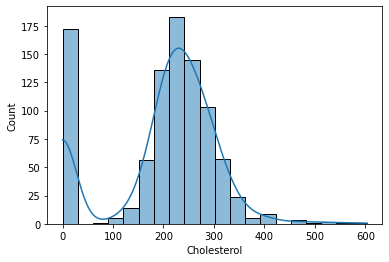

In [208]:
sns.histplot(df['Cholesterol'],kde=True,bins=20).set(xlabel='Cholesterol', ylabel='Count')

We can handle the situation by substituting the "missing" wrong data, the 0's, with the mean Cholesterol value of our dataset.
But since the missing data are a good amount, and the distribution of the Cholesterol in a population is normally distributed, if we "insert" only the mean value as the missing data we are going to generate a dataset that is more "anormal" than how it is supposed to be.

So we can also try and eliminate the Cholesterol == 0, and analyze the resulting dataframe df2

In [209]:
#Creating new datasets
#Without the Cholesterol == 0
df2 = df[df['Cholesterol']!=0]

#Dataset without the Resting BP == 0
df2 = df2[df2['RestingBP']!=0]

In [210]:
df2.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   746.000000  746           746  746.000000   746.000000  746.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  564           370         NaN          NaN         NaN   
mean     52.882038  NaN           NaN  133.022788   244.635389    0.167560   
std       9.505888  NaN           NaN   17.282750    59.153524    0.373726   
min      28.000000  NaN           NaN   92.000000    85.000000    0.000000   
25%      46.000000  NaN           NaN  120.000000   207.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   237.000000    0.000000   
75%      59.000000  NaN           NaN  140.000000   275.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         746  746.000000            746  746.000000      746   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          445         NaN            459         NaN      354   
mean          NaN  140.226542            NaN    0.901609      NaN   
std           NaN   24.524107            NaN    1.072861      NaN   
min           NaN   69.000000            NaN   -0.100000      NaN   
25%           NaN  122.000000            NaN    0.000000      NaN   
50%           NaN  140.000000            NaN    0.500000      NaN   
75%           NaN  160.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     746.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.477212  
std         0.499816  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

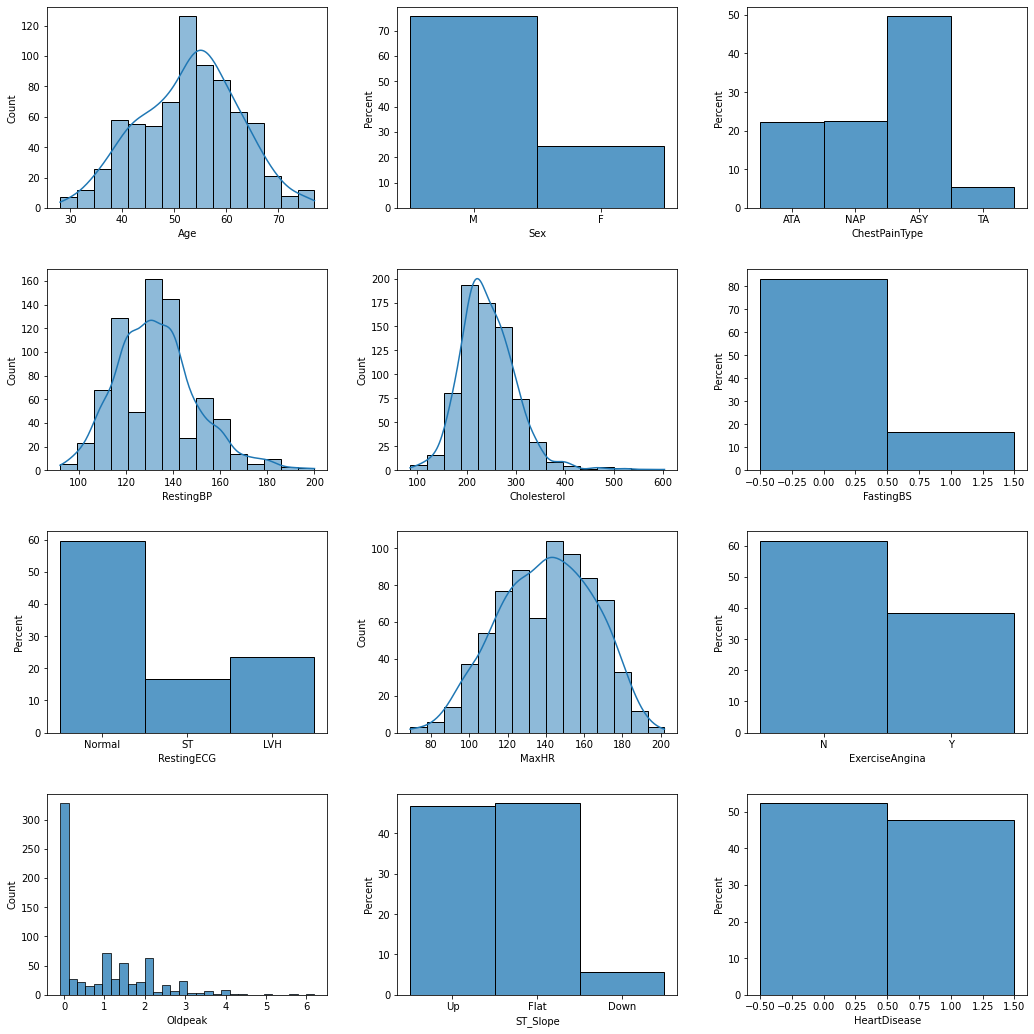

In [211]:
#Plotting all the Features 
fig, axs = plt.subplots(4,3, figsize=(15,15))

#1 row graph
#Age
sns.histplot(df2['Age'],kde=True,bins=15, ax=axs[0,0]).set(xlabel='Age', ylabel='Count')
#Sex
sns.histplot(x='Sex',stat='percent',discrete = True, data=df2, ax=axs[0,1])
#ChestpainType
sns.histplot(x='ChestPainType',stat='percent', data=df2, ax=axs[0,2])

#2 row graph
#RestingBP
sns.histplot(df2['RestingBP'],kde=True,bins=15, ax=axs[1,0]).set(xlabel='RestingBP', ylabel='Count')
#Cholesterol
sns.histplot(df2['Cholesterol'],kde=True,bins=15, ax=axs[1,1]).set(xlabel='Cholesterol', ylabel='Count')
#FastingBS
sns.histplot(x='FastingBS',stat='percent',discrete=True, data=df2, ax=axs[1,2])

#3 row graph
#RestingECG
sns.histplot(x='RestingECG',stat='percent',discrete=True, data=df2, ax=axs[2,0])
#MaxHR
sns.histplot(df2['MaxHR'],kde=True,bins=15, ax=axs[2,1]).set(xlabel='MaxHR', ylabel='Count')
#ExerciseAngina
sns.histplot(x='ExerciseAngina',stat='percent',discrete=True, data=df2, ax=axs[2,2])

#4 row graph
#Oldpeak
sns.histplot(df2['Oldpeak'],bins=30, ax=axs[3,0]).set(xlabel='Oldpeak', ylabel='Count')
#ST_Slope
sns.histplot(x='ST_Slope',stat='percent',discrete=True, data=df2, ax=axs[3,1])
#HeartDisease
sns.histplot(x='HeartDisease',stat='percent',discrete=True, data=df2, ax=axs[3,2])


fig.tight_layout(pad=3.0) 
plt.savefig('EDA_graphs.png', facecolor = 'w')
plt.show()

We can observe that a lot of other numerical variables are normally distributed, like Age, RestingBP, Cholesterol,MaxHR.

In [213]:
#Change Binary Features in 0's and 1's.
#Sex
df2['Sex'] = pd.factorize(df2['Sex'])[0]
#ExerciseAngina
df2['ExerciseAngina'] = pd.factorize(df2['ExerciseAngina'])[0]
df2


Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    0           ATA        140          289          0     Normal   
1     49    1           NAP        160          180          0     Normal   
2     37    0           ATA        130          283          0         ST   
3     48    1           ASY        138          214          0     Normal   
4     54    0           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    0            TA        110          264          0     Normal   
914   68    0           ASY        144          193          1     Normal   
915   57    0           ASY        130          131          0     Normal   
916   57    1           ATA        130          236          0        LVH   
917   38    0           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[746 rows x 12 columns]

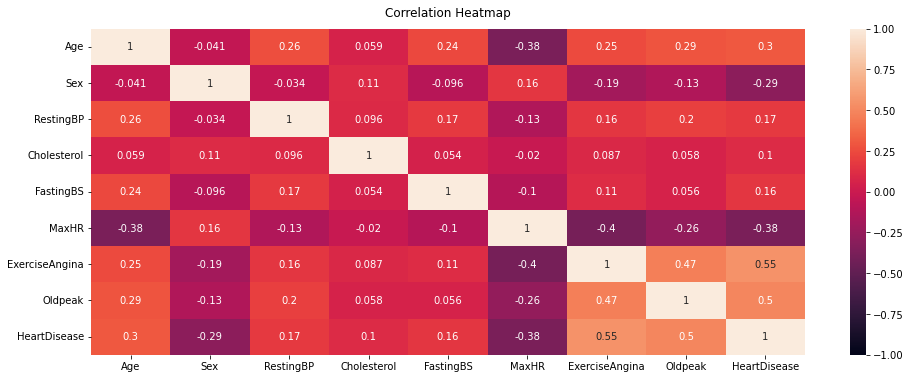

In [214]:
## Picture of Correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The variables are not very correlated.
The more correlated are:
- Age and MaxHR (negative correlation of -0.4)
- Exercise Angina and MAxHR
- Exercise Angina and MAxHR AND Heart Disease

## Brief analysis about the Categorical variables

#### ChestPainType, RestingECG, ST_Slope


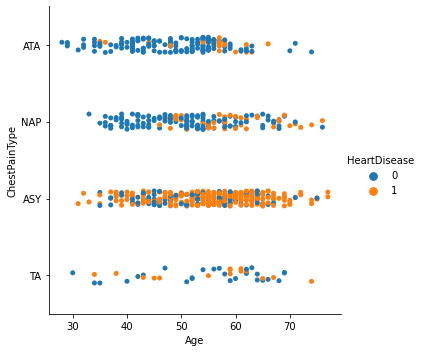

In [215]:
#Graph about ChestPainType, Age And Heart Disease
sns.catplot( x ='Age', y ='ChestPainType' , hue = 'HeartDisease', data=df2)

TA: Typical Angina
ATA: Atypical Angina
NAP: Non-Anginal Pain
ASY: Asymptomatic

Seems that the Asy cathegory have the most influencial effect on the Heart Desease

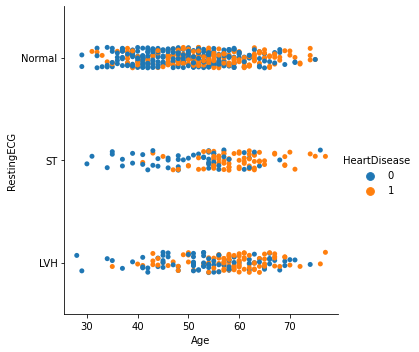

In [190]:
#Graph about RestingECG, Age And Heart Desease
sns.catplot( x ='Age', y ='RestingECG' , hue = 'HeartDisease', data=df2)

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

Seems that all three variables are affected bt Heart Desease


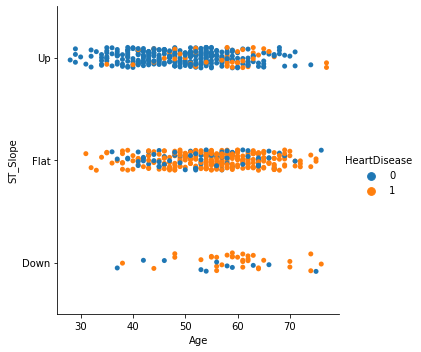

In [216]:
#Graph about RestingECG, Age And Heart Desease
sns.catplot( x ='Age', y ='ST_Slope' , hue = 'HeartDisease', data=df2)

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

The "UP" cathegory influence less the Heart Desease, while Flat and Down have a lot more Heart Desease cases in their cathegory.

## Transform the categorical data in multiple binary features

In [219]:
df3 = pd.get_dummies(df2)
df3.head(10)

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    0        140          289          0    172               0   
1   49    1        160          180          0    156               0   
2   37    0        130          283          0     98               0   
3   48    1        138          214          0    108               1   
4   54    0        150          195          0    122               0   
5   39    0        120          339          0    170               0   
6   45    1        130          237          0    170               0   
7   54    0        110          208          0    142               0   
8   37    0        140          207          0    130               1   
9   48    1        120          284          0    120               0   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0                  0                  1   
1      1.0             1                  0                  0   
2      0.0             0                  0                  1   
3      1.5             1                  1                  0   
4      0.0             0                  0                  0   
5      0.0             0                  0                  0   
6      0.0             0                  0                  1   
7      0.0             0                  0                  1   
8      1.5             1                  1                  0   
9      0.0             0                  0                  1   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                  0                 0               0                  1   
1                  1                 0               0                  1   
2                  0                 0               0                  0   
3                  0                 0               0                  1   
4                  1                 0               0                  1   
5                  1                 0               0                  1   
6                  0                 0               0                  1   
7                  0                 0               0                  1   
8                  0                 0               0                  1   
9                  0                 0               0                  1   

   RestingECG_ST  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0              0              0              0            1  
1              0              0              1            0  
2              1              0              0            1  
3              0              0              1            0  
4              0              0              0            1  
5              0              0              0            1  
6              0              0              0            1  
7              0              0              0            1  
8              0              0              1            0  
9              0              0              0            1